Computational Social Science Project #2
Enter your Name: Hind Raeialboom

Semester: Fall 2024

Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:

Code and documentation provided in the course notebooks

Markdown cheatsheet to help with formatting the Jupyter notebook

Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!

Send me a pull request on GitHub flagging the syntax that's tripping you up

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [71]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [72]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 

diabetes = pd.read_csv("/Users/hindalboom/Computational-Social-Science-Projects/Project-2/Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 
diabetes.head()


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_1,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some o

In [73]:

# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 


shape:  (3220, 95)


In [39]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [40]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()) 

print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()) 

print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()) 



['Suppressed']
['No Data']
['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [41]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 

# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int) 


# Physical Inactivity
# Obesity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int) 

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [42]:
# Scale to county populations
#-----------

# Select count variables to recode to percentages, excluding ratios and population columns
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]

# Recode selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# Divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [43]:
# Check
#-----------

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Inspect recoded values
diabetes_summary = diabetes.describe().transpose()  # Use transpose to switch rows and columns for readability
  
# Check recoding, display selected columns
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[:, [0, 1, 3, 7]])  # Present only selected columns from the summary (e.g., count, mean, min, max)

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [44]:
# Check for duplicate columns
#-----------

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x and y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

# Get list of duplicate columns
duplicateColumnNames = list(getDuplicateColumns(diabetes))

# Print duplicate columns
print('Duplicate Columns are as follows: ')
print(duplicateColumnNames)

# Drop duplicate columns from the DataFrame
#-----------
diabetes = diabetes.drop(columns=duplicateColumnNames)


Duplicate Columns are as follows: 
['race_total population_two or more races_1', 'sex and age_total population_65 years and over_1', 'sex and age_total population_18 years and over_1', 'hispanic or latino and race_total population', 'sex and age_total population', 'race_total population_one race_1']


Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [45]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

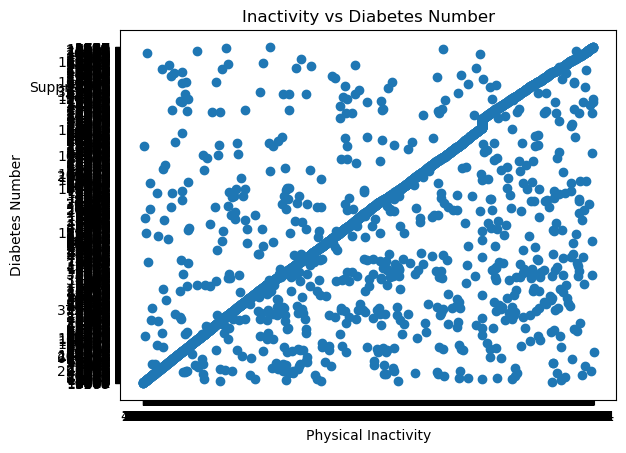

In [104]:
import matplotlib.pyplot as plt

# Visualisation: scatter plot showing Diabetes rates vs. physical inactivity
plt.scatter(data['Physical_Inactivity_Number'], data['Diabetes_Number'])
plt.xlabel('Physical Inactivity')
plt.ylabel('Diabetes Number')
plt.title('Inactivity vs Diabetes Number')

plt.show()

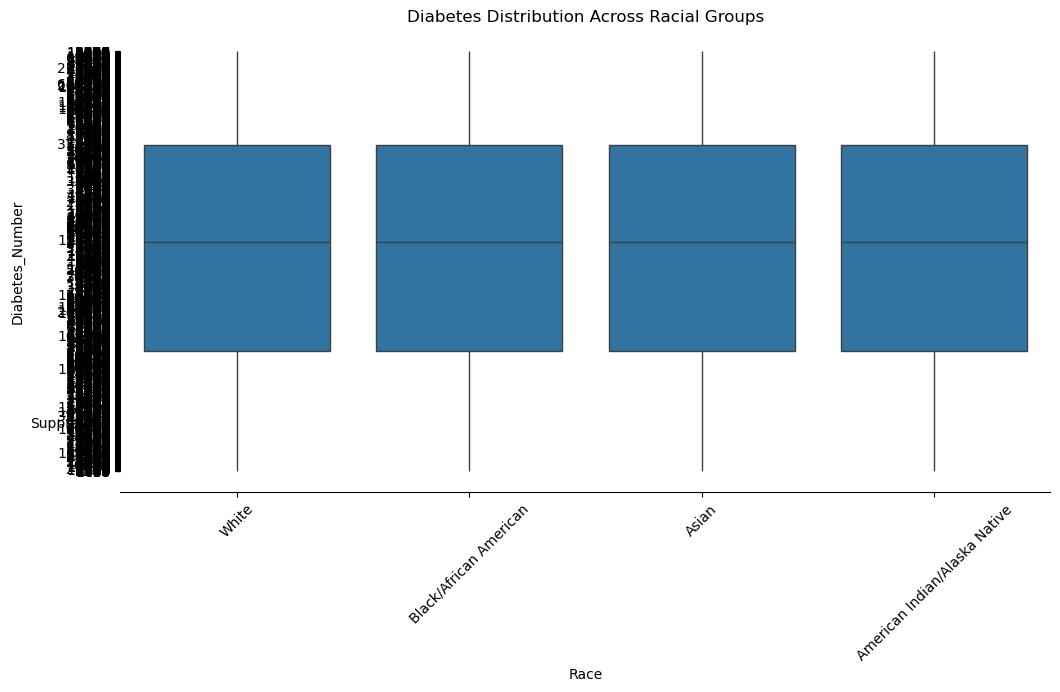

In [102]:
# Visualisation 2: Diabetes across different races / racial groups

import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataset to get a format suitable for seaborn boxplot
diabetes_melted = diabetes.melt(id_vars=['County', 'State', 'Diabetes_Number'], 
                                value_vars=['race_total population_one race_white', 
                                            'race_total population_one race_black or african american',
                                            'race_total population_one race_asian', 
                                            'race_total population_one race_american indian and alaska native'],
                                var_name='Race', value_name='Population')

diabetes_melted['Race'] = diabetes_melted['Race'].replace({
    'race_total population_one race_white': 'White',
    'race_total population_one race_black or african american': 'Black/African American',
    'race_total population_one race_asian': 'Asian',
    'race_total population_one race_american indian and alaska native': 'American Indian/Alaska Native'
})

# Create the box plot
plt.figure(figsize=(12, 6))
plt.grid(axis='y', linestyle='', which='both')
sns.boxplot(x='Race', y='Diabetes_Number', data=diabetes_melted, whis=[0,100], showcaps=False)
sns.despine(left=True)  # Remove the left spine
plt.title('Diabetes Distribution Across Racial Groups')
plt.xticks(rotation=45)
plt.show()


## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [47]:
# Drop and get dummies
#-----------

# Create dummy features out of 'Region', which might be related to diabetes rates
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  # Specify the 'Region' column
                               drop_first = True)  # Drop the first category as a reference (to avoid multicollinearity)

# Drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],  # Drop these two columns
                               axis = 1)  # axis=1 specifies that we're dropping columns

# Look at the first 10 rows of the new DataFrame
diabetes_clean.head(10)


,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [48]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create y dataframe (target variable)
y = diabetes_clean['Diabetes_Number']

# Create X dataframe (features)
X = diabetes_clean.drop(columns=['Diabetes_Number', 'race alone or in combination with one or more other races_total population'])

# First, split data into 60% training and 40% test/validation combined
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Next, split the 40% into 20% validation and 20% test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data for Ridge or Lasso models
scaler = StandardScaler()

# Standardize training data
X_train_scaled = scaler.fit_transform(X_train)

# Standardize validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [50]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Set random seed
np.random.seed(10)

# Training/test/validation split
# First, split into 60% train and 40% temp (test + validation) - Splits data into 60% for training and 40% for validation/test combined.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=10)


# Split the 40% temp into 20% validation and 20% test - Further splits the 40% into 20% validation and 20% test.
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

# Standardization - Only non-dichotomous numeric variables are standardized to ensure the scale of features is appropriate for the model, while categorical or binary variables are left untouched.

# Identify non-dichotomous numeric columns
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2].columns)

# Apply standardization only to non-dichotomous columns in training, validation, and test sets
scaler = StandardScaler()

# Standardize the columns in training data
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# Standardize the columns in validation data
for column in columns:
    X_validate[column] = scaler.transform(X_validate[column].values.reshape(-1, 1)).flatten()

# Standardize the columns in test data
for column in columns:
    X_test[column] = scaler.transform(X_test[column].values.reshape(-1, 1)).flatten()


## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very low penalty (e.g., an alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** ...

OLS (Ordinary Least Squares) is a technique that minimizes the sum of squared residuals (differences between observed and predicted values) to fit a linear relationship between independent variables and the target variable. It assumes independence of errors, homeoscedasticity, and no multicollinearity between predictors - making is simple and interpretable. It is, however, sensitive to outliers and can perform poorly with multicollinearity and non-linear relationships.

Ridge regression is a model that is very similar to OLS, but introduces regularization to handle multicollinearity. By adding an L2 penalty to the OLS loss function, it prevents large coefficients and therefore addresses the multicollinearity problem. It's a model that helps address overfitting. 

Lasso is another regression model that also adds a pnalty (L1), which can force some coefficients to become exactly zero. However, if regularization is too high, it can remove important variables. 

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1: OLS

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model 1: Train OLS regression model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Predictions and performance on the training set
y_train_pred_ols = ols_model.predict(X_train)
mse_train_ols = mean_squared_error(y_train, y_train_pred_ols)

print(f"OLS Training MSE: {mse_train_ols}")

OLS Training MSE: 0.0003653383288582568


#### Model 2: Ridge

In [83]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Model 2: Train Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predictions and performance on the training set
y_train_pred_ridge = ridge_model.predict(X_train)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)

print(f"Ridge Training MSE: {mse_train_ridge}")


Ridge Training MSE: 0.0003655301637268494


#### Model 3:  Lasso

In [84]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Model 3: Train Lasso regression model with alpha=0.001 (low penalty to avoid convergence issues)
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Predictions and performance on the training set
y_train_pred_lasso = lasso_model.predict(X_train)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)

print(f"Lasso Training MSE: {mse_train_lasso}")


Lasso Training MSE: 0.00039814407736722636


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [85]:
#
# Predict on validation data

from sklearn.metrics import mean_squared_error

# OLS model predictions on validation set
y_val_pred_ols = ols_model.predict(X_validate)
mse_val_ols = mean_squared_error(y_validate, y_val_pred_ols)
print(f"OLS Validation MSE: {mse_val_ols}")

# Ridge model predictions on validation set
y_val_pred_ridge = ridge_best_model.predict(X_validate)
mse_val_ridge = mean_squared_error(y_validate, y_val_pred_ridge)
print(f"Ridge Validation MSE: {mse_val_ridge}")

# Lasso model predictions on validation set
y_val_pred_lasso = lasso_best_model.predict(X_validate)
mse_val_lasso = mean_squared_error(y_validate, y_val_pred_lasso)
print(f"Lasso Validation MSE: {mse_val_lasso}")


OLS Validation MSE: 94664876.66320506
Ridge Validation MSE: 100139879.1249617
Lasso Validation MSE: 1717132.563311505


### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [87]:
# Best performing is Lasso model based on validation performance (since Lasso had the lowest MSE)
y_test_pred_lasso = lasso_best_model.predict(X_test)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print(f"Lasso Test MSE: {mse_test_lasso}")


Lasso Test MSE: 666161.8149409799


### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [88]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best Lasso model
cv_scores_lasso = cross_val_score(lasso_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_lasso = -cv_scores_lasso.mean()
std_cv_lasso = cv_scores_lasso.std()

print(f"Lasso Cross-Validation Mean MSE: {mean_cv_lasso}")
print(f"Lasso Cross-Validation MSE Standard Deviation: {std_cv_lasso}")


Lasso Cross-Validation Mean MSE: 0.00039670606294895175
Lasso Cross-Validation MSE Standard Deviation: 3.764441066787141e-05


In [89]:
# Hyperparameter tuning for Ridge

from sklearn.model_selection import GridSearchCV

# Define a range of alphas for Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best alpha
best_alpha_ridge = ridge_grid.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha_ridge}")

# Train Ridge with best alpha
ridge_best_model = Ridge(alpha=best_alpha_ridge)
ridge_best_model.fit(X_train, y_train)


Best alpha for Ridge: 10


Ridge(alpha=10)

In [94]:
# Hyperparameter tuning for Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define a range of alpha values to test for Lasso
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Initialize Lasso model with increased max_iter
lasso = Lasso(max_iter=5000)

# Perform GridSearch with cross-validation
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Retrieve the best alpha for Lasso
best_alpha_lasso = lasso_grid.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# Train the Lasso model with the best alpha and increased max_iter
lasso_best_model = Lasso(alpha=best_alpha_lasso, max_iter=5000)
lasso_best_model.fit(X_train, y_train)

# Predictions and performance on the training set
y_train_pred_lasso_best = lasso_best_model.predict(X_train)
mse_train_lasso_best = mean_squared_error(y_train, y_train_pred_lasso_best)
print(f"Lasso Training MSE with Best Alpha and increased iterations: {mse_train_lasso_best}")


Best alpha for Lasso: 0.0001
Lasso Training MSE with Best Alpha and increased iterations: 0.00037241969143346146


## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff is one of the key challenges in machine learning. Essentially, bias refers to errors made by the model because it’s too simple and doesn’t capture the underlying patterns in the data (this is called underfitting). On the other hand, variance refers to the model being too complex and overly sensitive to the training data, which makes it perform poorly on new data (this is called overfitting). 

In this project, managing this tradeoff was important. I used models like Ridge and Lasso because they introduce regularization, which helps control variance and prevent overfitting. The balance between bias and variance helps determine how well the model will generalize to new, unseen data. If the model is too complex (high variance), it’ll fit the training data well but fail when predicting new outcomes. If it’s too simple (high bias), it won’t perform well on either the training or test data.


2. Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting happens when a model captures too much of the noise in the training data, meaning it fits the data so closely that it struggles to predict outcomes on new data. This is a big problem because the whole point of machine learning is to make predictions on data we haven’t seen bef

In this case, overfitting would mean that our model does really well on the training data but poorly on the validation or test data. One way to tackle this is through regularization, like Ridge and Lasso regression, which can shrink model coefficients and prevent the model from getting too complex. Cross-validation also helps because it gives us a sense of how the model performs across different subsets of data, ensuring that it isn’t just memorizing the training set.


3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

After working through the models, I found that Lasso was the best-performing model by a huge margin. Both OLS and Ridge regression had high error rates, but Lasso’s ability to shrink coefficients and reduce complexity helped it achieve a much lower validation MSE. This suggests that Lasso did a better job at generalizing the relationship between features and diabetes rates without overfitting to the noise in the data.

Based on this, I’d recommend using the Lasso model for the diabetes pilot program. In terms of which counties or regions to prioritize, I’d focus on areas with the highest predicted diabetes rates, which could be identified using the model’s predictions. Of course, additional factors like age, race, or gender composition could be considered, but it’s important to be cautious about introducing bias when using these features.

I’m reasonably confident about deploying this model in the real world, mainly because Lasso not only performed well but also selected the most relevant features, making the model more interpretable. That said, I’d still recommend testing it further with more recent data or data from different regions to make sure it holds up under different conditions.